# PGE323M Reservoir Engineering III (Simulation)

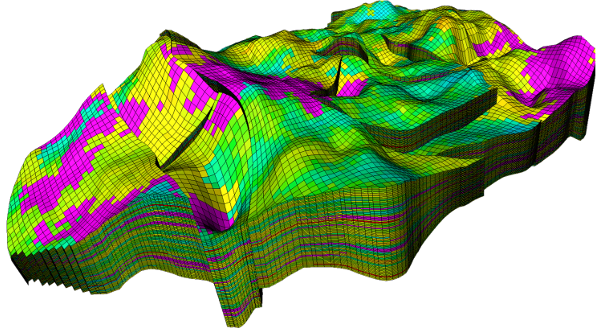

In [27]:
import IPython.display
from IPython.core.display import HTML 
IPython.display.Image('images/sim.png', embed=True)

&copy; UNISIM, [Image Source](https://www.unisim.cepetro.unicamp.br/benchmarks/images/UNISIM_II_R.png)

# What is reservoir simulation?

 * Understand flow and transport in our reservoirs to make engineering decisions

 * Develop mathematical models to describe pressure, velocity, saturation, etc.

 * Described by coupled, nonlinear partial differential equations (PDEs)

 * Solution to PDEs can’t be found analytically – we are left with solving numerically

# Reservoir simulators help us answer several questions

 1. How should a field be developed to maximize economic recovery?
 
 1. What is the best enhanced recovery scheme for the reservoir?
 
 1. Why is the reservoir not behaving according to predictions made by previous engineering studies? 
 
 1. What is the ultimate economic recovery of the field?
 
 1. What type of laboratory data is required?
 
 1. Is it necessary to do physical model studies of the reservoir?
 
 1. What is the best completion scheme for wells?
 
 1. From what portion of the reservoir is the production coming?

In [1]:
%load_ext tikzmagic

# Modeling and simulation

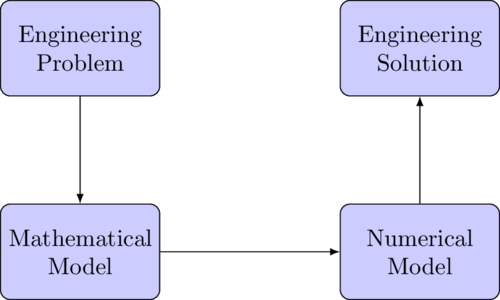

In [21]:
%%tikz --scale 1.0 --size 500,500 -f png
\tikzstyle{block} = [rectangle, draw, fill=blue!20,  node distance=3cm, text width=6em, text centered, rounded corners, minimum height=4em]
\tikzstyle{line} = [draw, -latex]
\node [block] (problem) {Engineering Problem};
\node [block, below of=problem] (model) {Mathematical Model};
\node [block, right of=model, node distance=5cm] (numerical) {Numerical Model};
\node [block, right of=problem, node distance=5cm] (solution) {Engineering Solution};
\path [line] (problem) -- (model);
\path [line] (model) -- (numerical);
\path [line] (numerical) -- (solution);

# All steps in simulation are important

  * Conversion to mathematical model requires understanding physics
  
    * Fluid and rock properties of the reservoir
    
    * Laws that describe flow and transport (conservation of mass, energy, and momentum)

  * Numerical solution to the mathematical problem requires simplifications and approximations that are still accurate
  
   * Assume that fluid and rock properties are constant over a control volume
   
   * Transform non-linear PDEs into linear system of algebraic equations
   
   * Solve the system of equations

  * Using the math solution to find an engineering solution requires economics, experience, and good decision-making skills

# General idea

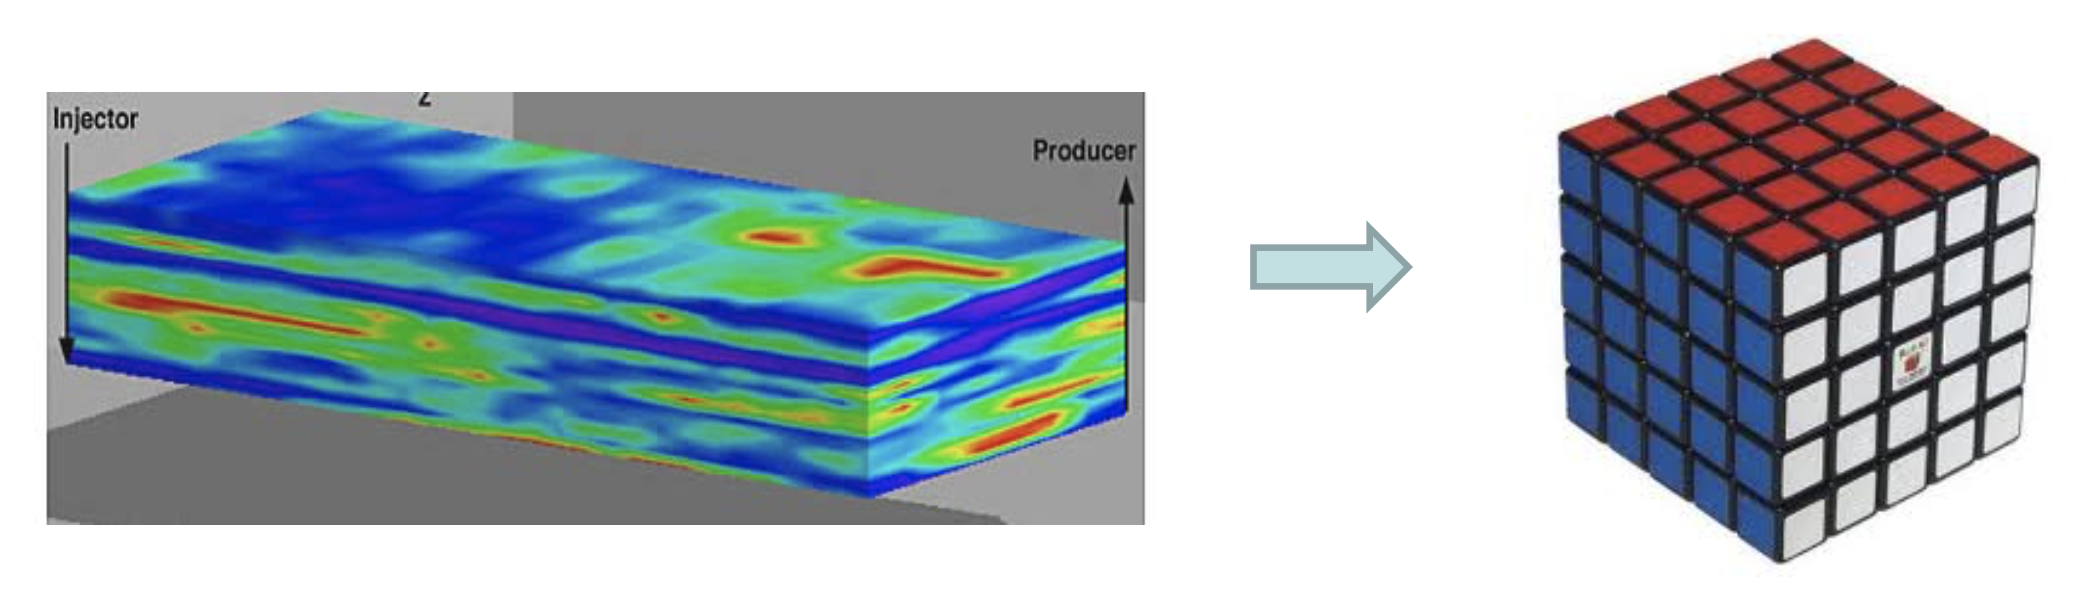

In [24]:
IPython.display.Image('images/res_to_block.png', embed=True)

 * Break up the reservoir into individual "blocks", "grids", "cells", or "elements"

 * Write algebraic equations for pressure, saturation, etc. each block

 * Each block depends on the adjacent block equations so we get a system of linear equations

 * Solve the system of equations. More blocks means more accuracy, but longer computation time

# Simulation schematic

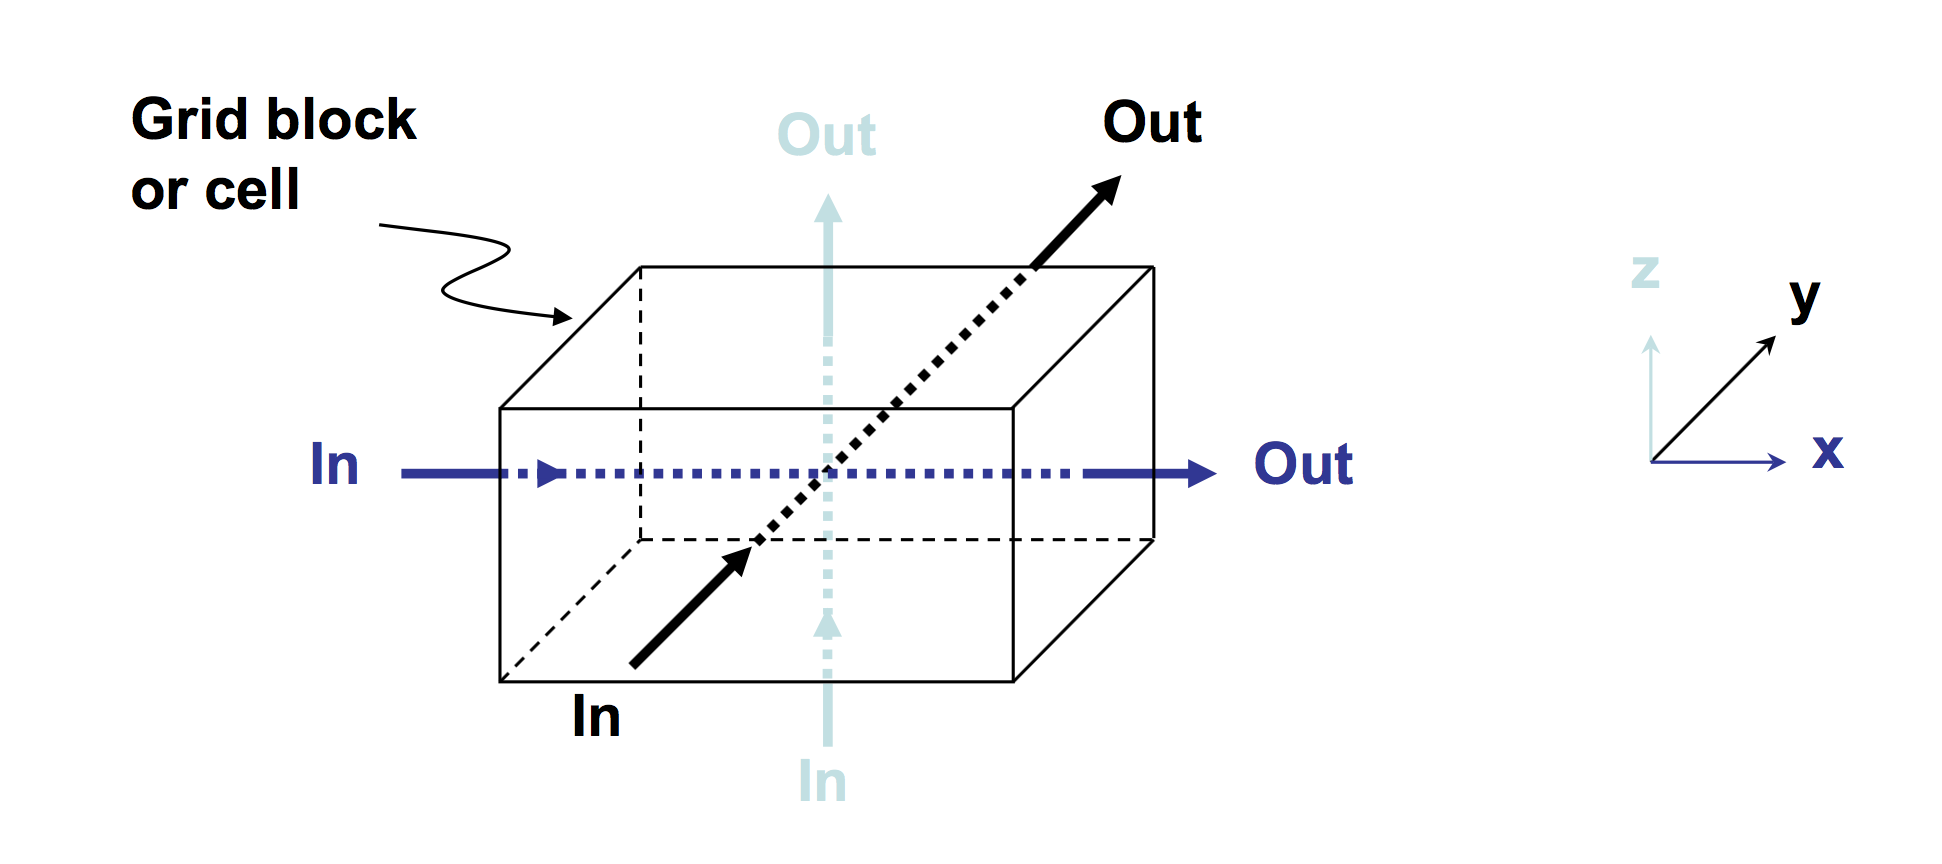

In [29]:
IPython.display.Image('images/sim_schematic.png', embed=True, width=500)

### Conservation law...

 * {Rate In} - {Rate Out} = {Accumulation}
 
 * For each component (oil, gas, water, energy)
 
 * For each cell

# Solving the PDEs that describe flow in porous media

 * Equations come from a mass balance and implementing Darcy's law:

$$
\genfrac{}{}{0.75pt}{0}{\partial}{\partial x}\left[\lambda_o \left(\genfrac{}{}{0.75ptpt}{0}{\partial p_o}{\partial x} - \gamma_o \genfrac{}{}{0.75pt}{0}{\partial \bar{z}}{\partial x} \right)\right]  = \genfrac{}{}{0.75pt}{0}{\partial}{\partial t}\left[\genfrac{}{}{0.75pt}{0}{\phi S_o}{B_o}\right] \\
\genfrac{}{}{0.75pt}{0}{\partial}{\partial x}\left[\lambda_w \left(\genfrac{}{}{0.75pt}{0}{\partial p_w}{\partial x} - \gamma_w \genfrac{}{}{0.75pt}{0}{\partial \bar{z}}{\partial x} \right)\right]  = \genfrac{}{}{0.75pt}{0}{\partial}{\partial t}\left[\genfrac{}{}{0.75pt}{0}{\phi S_w}{B_w}\right]
$$

#  Complications
 
 * Coupled equations (water and oil)
    
 * PDEs (time and space – 1, 2 ,or 3D)
    
 * Variable properties (like permeability and porosity)

# Approximations 
 
$$
\begin{bmatrix}
T_1 & -T_{1/2} & & \\
-T_{1/2} & T_2 & -T_{3/2} & \\
& -T_{3/2} & T_3 & -T_{5/2} \\
& & -T_{5/2} & T_4
\end{bmatrix}
\left\lbrace
\begin{matrix}
P_1 \\ P_2 \\ P_3 \\ P_4
\end{matrix}
\right\rbrace
=
\left\lbrace
\begin{matrix}
Q_1 \\ Q_2 \\ Q_3 \\ Q_4
\end{matrix}
\right\rbrace
$$

# What tools do I need to create my simulator?

 * Write equations for fluid transport in porous media, rock/fluid properties, and conservation of mass, momentum, and energy 

 * Use and perform error analysis of approximate numerical techniques to solve math problems
 
   * Root finding
    
   * Systems of equations
   
   * Interpolation, Integration, etc.
   
   * Solution to differential equations

 * Develop computer programs to solve these massive numerical problems

# Why can't I just use a commercial simulator (CMG, Eclipse) that someone smart already made?

 * Great danger in using software if you don’t understand the fundamentals it was built on

 * Simulators have lots of limitations. They can give very misleading results and only an understanding of the problem and mathematics will help your recognize when they do.

* Understanding the math and physics separates you from the technician

* Who knows you might be the smart person that creates the next commercial reservoir simulator

# Categories of Reservoir Simulators

* Commercial

  * CMG
  
  * Eclipse (Schlumberger)
  
  * Intersect (Schlumberger + Chevron)
  
  * Nexus (Halliburton)
  
  
* In House

  * Empower (ExxonMobil)
  
  * Cheers (Chevron)
  
  * PSim (ConocoPhillips)
  
  * MoReS – (Shell)
  
  * Powers – (Saudi)
  

* Academic

  * UT-CHEM (UT Chemical Flooding)
  
  * IPARS (UT Multiscale Simulation)
  
  * GPAS (UT compositional)
  
  * TOUGH2 (Lawrence Berkley National Labs)